In [112]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 1. Playing with Seminar Code

In [113]:
def plot_signal_changes(tt, yy, changes):
    fig, ax = plt.subplots(len(changes), 2, figsize=(12, 3 * len(changes)), sharex=True, sharey=True, frameon=False)

    yy = yy.copy()
    for i in range(len(changes)):
        for j in range(2):
            if j % 2:
                yy += changes[i]
                ax[i, j].plot(tt / (2 * np.pi), yy)
                ax[i, j].grid()
            else:
                ax[i, j].plot(tt / (2 * np.pi), changes[i])
                ax[i, j].grid()

    fig.text(0.5, 0.0, '$t$, cycles', ha='center', va='top', fontsize=14)
    fig.text(0.0, 0.5, 'Signal, arb.units', ha='right', va='center', rotation='vertical', fontsize=14)

    plt.tight_layout()
    plt.show()

In [114]:
def apply_changes(yy, changes):
    yy = yy.copy()

    for change in changes:
        yy += change

    return yy

In [115]:
tt = np.linspace(-20 * 2 * np.pi, 20 * 2 * np.pi, 3 ** 9)

changes = [np.zeros_like(tt), 
           np.sin(3 * tt) * np.exp(-(tt - 5 * 2 * np.pi) ** 2 / (2 * 20 ** 2)), 
           np.sin(5.5 * tt) * np.exp(-(tt + 10 * 2 * np.pi) ** 2 / (2 * 5 ** 2))]

yy = np.sin(tt) * np.exp(-tt ** 2 / (2 * 20 ** 2))

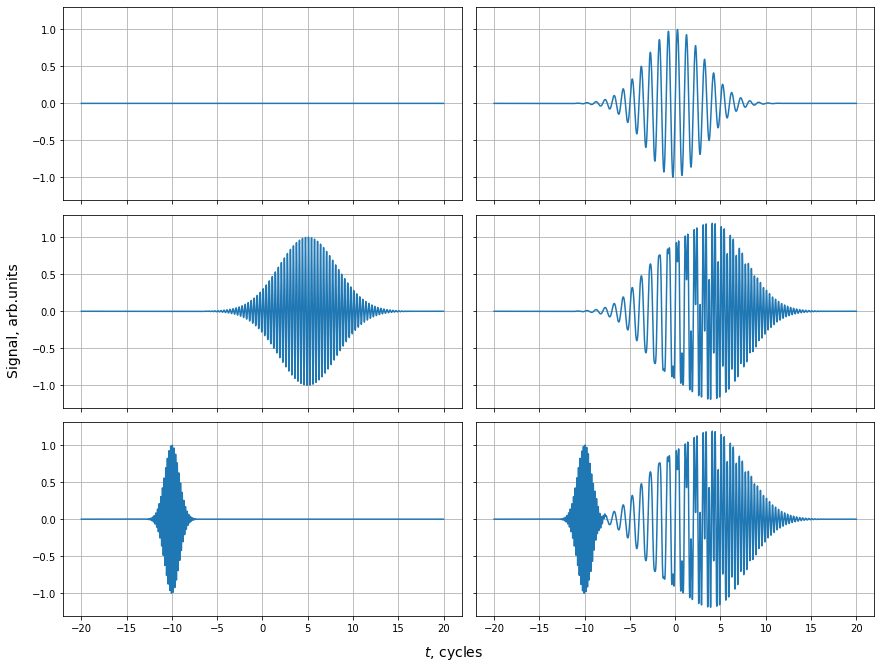

In [116]:
plot_signal_changes(tt, yy, changes)

In [117]:
yy_changed = apply_changes(yy, changes)

In [118]:
def plot_signal_frequencies(tt, yy):
    values = np.abs(np.fft.fft(yy)[:len(yy) // 2]) ** 2
    frequencies = np.fft.fftfreq(len(yy), d=(tt[1] - tt[0]) / (2 * np.pi))[:len(yy) // 2]

    plt.figure(figsize=(10, 8))
    plt.plot(frequencies, values)

    plt.xlim(0., 6.)
    plt.xlabel('Frequency, arb. units', fontsize=14)
    plt.ylabel('Power spectrum, arb. units', fontsize=14)

    plt.grid()
    plt.show()

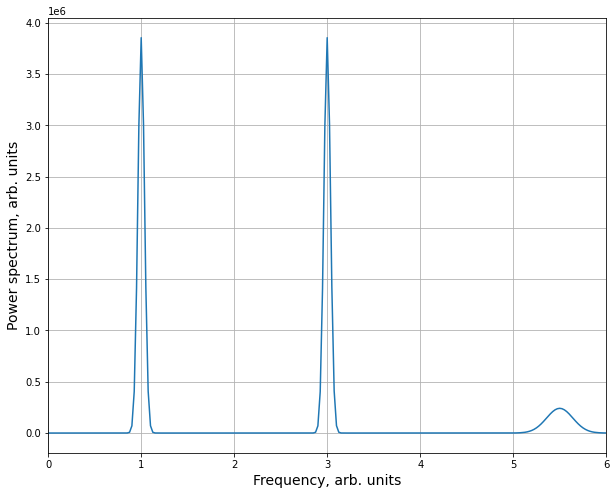

In [119]:
plot_signal_frequencies(tt, yy_changed)

# 2. Appending 4'th Wave Packet

In [120]:
changes += [np.sin(4 * tt) * np.exp(-(tt - 7 * 2 * np.pi) ** 2 / (2 * 10 ** 2))]

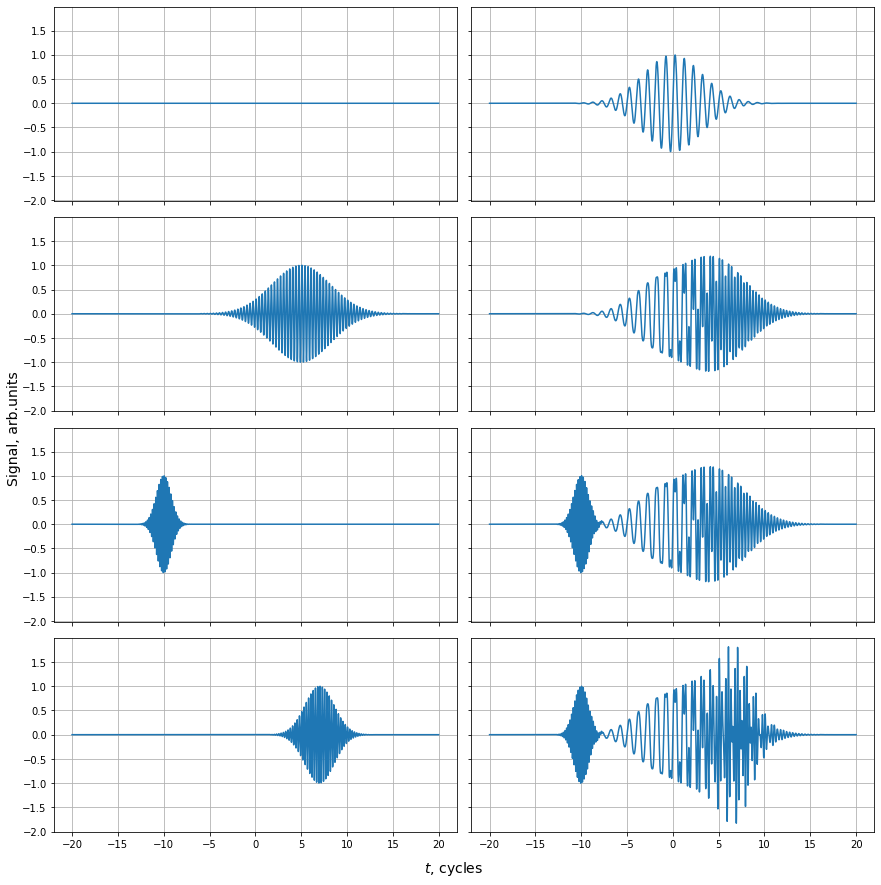

In [121]:
plot_signal_changes(tt, yy, changes)

In [122]:
yy_changed = apply_changes(yy, changes)

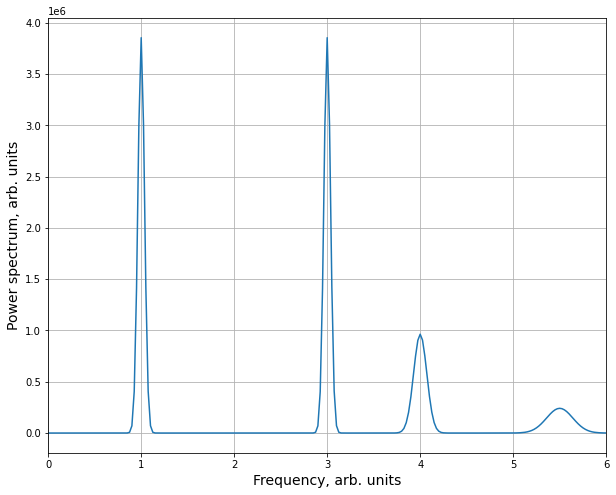

In [123]:
plot_signal_frequencies(tt, yy_changed)

One can clearly see that after appending to the signal one more wave packet of frequency 4 the corresponding FFT spectrum shows extra peak at the point 4 of frequency domain.

# 3. Constructing Spectrogram vie Gabor Transform

In [124]:
def plot_signal_and_window(tt, yy, window_width, window_position, window_intensity=1.):
    window_function = window_intensity * np.exp(-(tt - window_position) ** 2 / (2 * window_width**2))
    yy_window = yy * window_function

    fig, ax = plt.subplots(3, 1, figsize=(12, 12), sharex=True, sharey=True, frameon=False)

    signals = [yy, window_function, yy_window]
    labels = ['Signal, arb. units, ', 'Window, arb. units', 'Windowed signal, arb. units']

    for i in range(3):
        ax[i].plot(tt / (2 * np.pi), signals[i])
        ax[i].set_xlabel('$t$, cycles', fontsize=14)
        ax[i].set_ylabel(labels[i], fontsize=14)
        ax[i].grid()

    plt.tight_layout()
    plt.show()    

In [125]:
window_width = 4.0 * 2 * np.pi
window_position = -5.0 * 2 * np.pi
window_intensity = 2

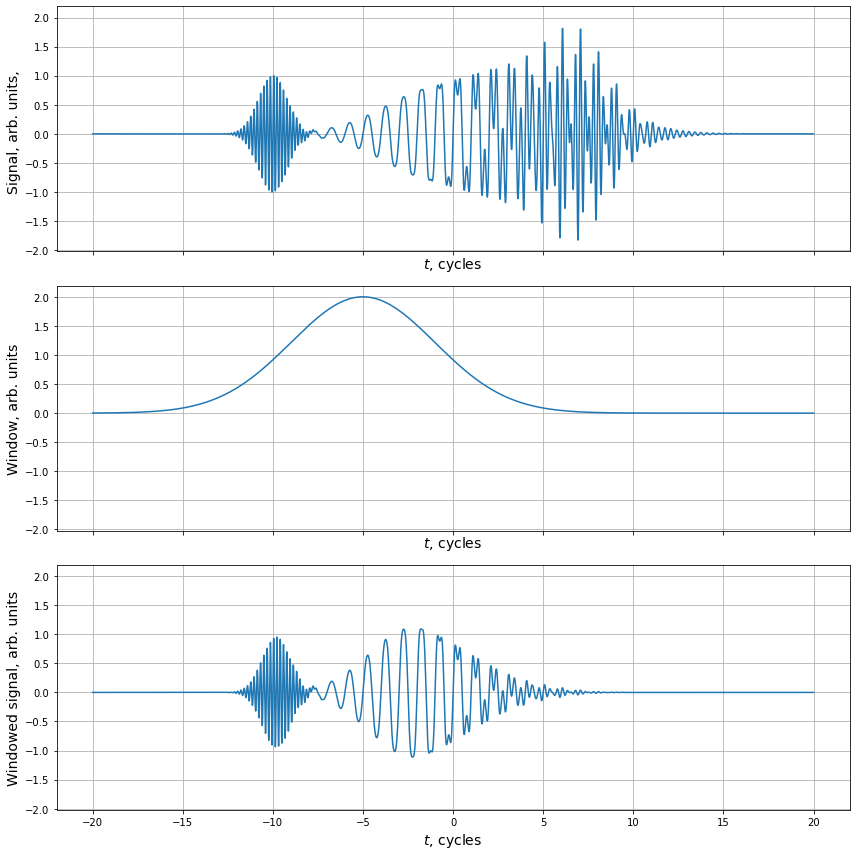

In [126]:
plot_signal_and_window(tt, yy_changed, window_width, window_position, window_intensity)

In [127]:
def construct_spectrogram(tt, yy, window_width=2.0 * 2 * np.pi, window_intensity=1., n_window_steps=2 ** 10):
    window_positions = np.linspace(-30 * 2 * np.pi, 30 * 2 * np.pi, n_window_steps)
    spectrogram = np.zeros((len(tt) // 2, len(window_positions)))

    for i, window_position in enumerate(window_positions):
        window_function = window_intensity * np.exp(-(tt - window_position) ** 2 / (2 * window_width**2))
        yy_window = (yy * window_function)

        values = np.abs(np.fft.fft(yy_window)) ** 2
        spectrogram[:, i] = values[:len(tt) // 2]

    frequencies = np.fft.fftfreq(len(yy), d=(tt[1] - tt[0]) / (2 * np.pi))[:len(tt) // 2]
    return window_positions, frequencies, np.log(1 + spectrogram)

In [128]:
def plot_spectrogram(window_positions, frequencies, spectrogram):
    plt.figure(figsize=(12, 12))
    plt.imshow(spectrogram, interpolation='nearest', aspect='auto', cmap=cm.Blues_r,
            extent=[window_positions.min() / (2 * np.pi), window_positions.max() / (2 * np.pi), frequencies.max(), frequencies.min()])

    plt.ylim(0, 7)
    plt.xlabel('$t$, cycles', fontsize=14)
    plt.ylabel('Power spectrum, arb. units', fontsize=14)
    plt.show()

In [129]:
window_positions, frequencies, spectrogram = construct_spectrogram(tt, yy_changed, window_width=4 * 2 * np.pi, n_window_steps=1000)

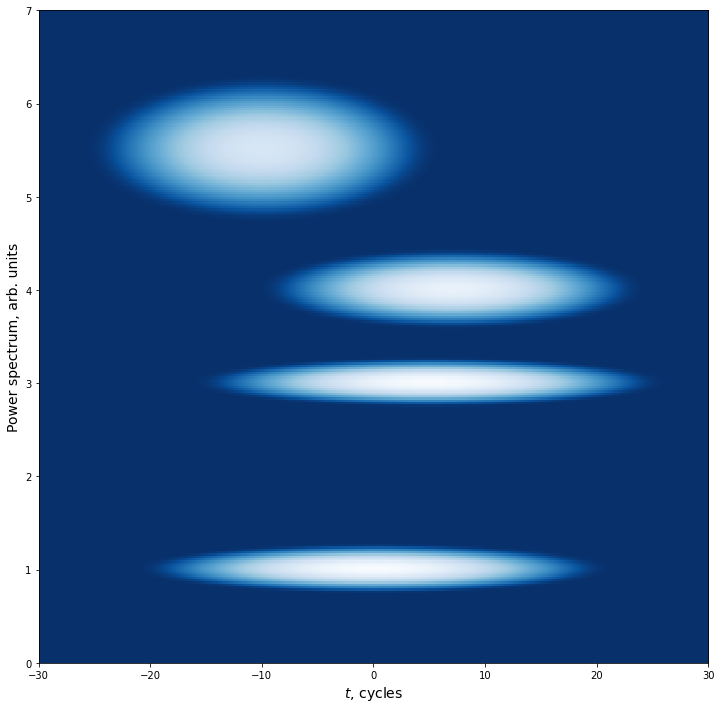

In [130]:
plot_spectrogram(window_positions, frequencies, spectrogram)

# 4. Changes in Timing

In [111]:
for i in range(-5, 6):
    tt = np.linspace(-20 * 2 * np.pi, 20 * 2 * np.pi, 2 ** 12 + i)

    yy = np.sin(tt) * np.exp(-tt ** 2 / (2 * 20 ** 2))

    changes = [np.zeros_like(tt), 
           np.sin(3 * tt) * np.exp(-(tt - 5 * 2 * np.pi) ** 2 / (2 * 20 ** 2)), 
           np.sin(5.5 * tt) * np.exp(-(tt + 10 * 2 * np.pi) ** 2 / (2 * 5 ** 2))]

    yy_changed = apply_changes(yy, changes)
    
    print(f'Shift by {i} from 2 ** 12')
    %timeit -n 10 -r 7 construct_spectrogram(tt, yy_changed, n_window_steps=1000)
    print('\n')

Shift by -5 from 2 ** 12
10 loops, best of 7: 664 ms per loop


Shift by -4 from 2 ** 12
10 loops, best of 7: 311 ms per loop


Shift by -3 from 2 ** 12
10 loops, best of 7: 675 ms per loop


Shift by -2 from 2 ** 12
10 loops, best of 7: 401 ms per loop


Shift by -1 from 2 ** 12
10 loops, best of 7: 289 ms per loop


Shift by 0 from 2 ** 12
10 loops, best of 7: 265 ms per loop


Shift by 1 from 2 ** 12
10 loops, best of 7: 672 ms per loop


Shift by 2 from 2 ** 12
10 loops, best of 7: 674 ms per loop


Shift by 3 from 2 ** 12
10 loops, best of 7: 677 ms per loop


Shift by 4 from 2 ** 12
10 loops, best of 7: 312 ms per loop


Shift by 5 from 2 ** 12
10 loops, best of 7: 657 ms per loop




According to https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html, FFT refers to an improved version of DFT. It can be calculated by using symmetries which are the highest when $n$ is a power of 2, and the transform is therefore most efficient for these sizes.